# 1. Single Linear Regression - Video Game Sales
## (Using one feature to predict a continuous numerical target)
## https://www.kaggle.com/datasets/ulrikthygepedersen/video-games-sales

In [1]:
#Import Statments
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [2]:
# Loading video game sales data
df_VideoGame = pd.read_csv('video_games_sales.csv')

# Visualizing the dataframe
df_VideoGame

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


## Let's see if we can use a subset of this data to predict the target variable: global_sales

In [3]:
# Exctracting Features from the original df_VideoGame Dataset
df_VideoGameFeatureSubset = df_VideoGame[['platform', 'year', 'genre', 'publisher','na_sales', 'global_sales']]

# Dropping null values from the dataset
df_VideoGameFeatureSubset.dropna(inplace=True)
df_VideoGameFeatureSubset.isnull().sum()

/tmp/ipykernel_372006/2330514909.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_VideoGameFeatureSubset.dropna(inplace=True)


platform        0
year            0
genre           0
publisher       0
na_sales        0
global_sales    0
dtype: int64

In [4]:
# Initialize the labelencoder object
le_videogame = LabelEncoder()

# Save the unencoded feature platform (In case you want to decode later)
df_VideoGame_decoded_platform = df_VideoGameFeatureSubset['platform']

# Override the original platform feature with the label encoded feature
df_VideoGameFeatureSubset['platform'] = le_videogame.fit_transform(df_VideoGameFeatureSubset['platform'])

# Print out the decoded series, platform
df_VideoGame_decoded_platform

/tmp/ipykernel_372006/3575130277.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_VideoGameFeatureSubset['platform'] = le_videogame.fit_transform(df_VideoGameFeatureSubset['platform'])


0        Wii
1        NES
2        Wii
3        Wii
4         GB
        ... 
16593    GBA
16594     GC
16595    PS2
16596     DS
16597    GBA
Name: platform, Length: 16291, dtype: object

In [5]:
# Save the unencoded feature genre (In case you want to decode later)
df_VideoGame_decoded_genre = df_VideoGameFeatureSubset['genre']

# Override the original genre feature with the label encoded feature
df_VideoGameFeatureSubset['genre'] = le_videogame.fit_transform(df_VideoGameFeatureSubset['genre'])

# Print out the decoded series, genre
df_VideoGame_decoded_genre

/tmp/ipykernel_372006/3503678093.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_VideoGameFeatureSubset['genre'] = le_videogame.fit_transform(df_VideoGameFeatureSubset['genre'])


0              Sports
1            Platform
2              Racing
3              Sports
4        Role-Playing
             ...     
16593        Platform
16594         Shooter
16595          Racing
16596          Puzzle
16597        Platform
Name: genre, Length: 16291, dtype: object

In [6]:
# Save the unencoded feature publisher (In case you want to decode later)
df_VideoGame_decoded_publisher = df_VideoGameFeatureSubset['publisher']

# Override the original publisher feature with the label encoded feature
df_VideoGameFeatureSubset['publisher'] = le_videogame.fit_transform(df_VideoGameFeatureSubset['publisher'])

# Print out the decoded series, publisher
df_VideoGame_decoded_publisher

/tmp/ipykernel_372006/109776527.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_VideoGameFeatureSubset['publisher'] = le_videogame.fit_transform(df_VideoGameFeatureSubset['publisher'])


0          Nintendo
1          Nintendo
2          Nintendo
3          Nintendo
4          Nintendo
            ...    
16593         Kemco
16594    Infogrames
16595    Activision
16596      7G//AMES
16597       Wanadoo
Name: publisher, Length: 16291, dtype: object

In [7]:
# Feel free to uncomment the chart below, may take a little while to output though
#sns.pairplot(df_VideoGameFeatureSubset.drop('global_sales', axis=1), kind='kde')

In [8]:
# View the labelencoded dataframe
df_VideoGameFeatureSubset

,platform,year,genre,publisher,na_sales,global_sales
0,26,2006.0,10,359,41.49,82.74
1,11,1985.0,4,359,29.08,40.24
2,26,2008.0,6,359,15.85,35.82
3,26,2009.0,10,359,15.75,33.00
4,5,1996.0,7,359,11.27,31.37
...,...,...,...,...,...,...
16593,6,2002.0,4,269,0.01,0.01
16594,7,2003.0,8,241,0.01,0.01
16595,16,2008.0,6,21,0.00,0.01
16596,4,2010.0,5,8,0.00,0.01


In [9]:
# Normailze platform, year, genre, and publisher
mm_scaler = MinMaxScaler(feature_range=(-1, 1))

df_VideoGameFeatureSubset[['platform', 'year', 'genre', 'publisher']] = mm_scaler.fit_transform(df_VideoGameFeatureSubset[['platform', 'year', 'genre', 'publisher']])
df_VideoGameFeatureSubset

/tmp/ipykernel_372006/2534807158.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_VideoGameFeatureSubset[['platform', 'year', 'genre', 'publisher']] = mm_scaler.fit_transform(df_VideoGameFeatureSubset[['platform', 'year', 'genre', 'publisher']])


,platform,year,genre,publisher,na_sales,global_sales
0,0.733333,0.30,0.818182,0.248696,41.49,82.74
1,-0.266667,-0.75,-0.272727,0.248696,29.08,40.24
2,0.733333,0.40,0.090909,0.248696,15.85,35.82
3,0.733333,0.45,0.818182,0.248696,15.75,33.00
4,-0.666667,-0.20,0.272727,0.248696,11.27,31.37
...,...,...,...,...,...,...
16593,-0.600000,0.10,-0.272727,-0.064348,0.01,0.01
16594,-0.533333,0.15,0.454545,-0.161739,0.01,0.01
16595,0.066667,0.40,0.090909,-0.926957,0.00,0.01
16596,-0.733333,0.50,-0.090909,-0.972174,0.00,0.01


In [10]:
# Create a pairplot for the normalized data, columns_to_manipulate, use kde for the kind
#sns.pairplot(df_VideoGameFeatureSubset, kind='kde')

In [11]:
# Save Checkpoint
df_VideoGameFeatureSubset.to_csv('Game_Data_Cleaned.csv')

In [12]:
# Load the cleaned video game sales data into a dataframe
df_VideoGameCleaned = pd.read_csv('Game_Data_Cleaned.csv')

# Remove the column named 'Unnamed: 0'
df_VideoGameCleaned.drop(columns="Unnamed: 0",inplace=True,axis=1)

# print out the dataframe
df_VideoGameCleaned.head()


,platform,year,genre,publisher,na_sales,global_sales
0,0.733333,0.30,0.818182,0.248696,41.49,82.74
1,-0.266667,-0.75,-0.272727,0.248696,29.08,40.24
2,0.733333,0.40,0.090909,0.248696,15.85,35.82
3,0.733333,0.45,0.818182,0.248696,15.75,33.00
4,-0.666667,-0.20,0.272727,0.248696,11.27,31.37


In [13]:
# use the pandas dataframe function called .corr() to quickly check which features most closely 'relate' to the target variable, higher is better
df_VideoGameCleaned.corr()

,platform,year,genre,publisher,na_sales,global_sales
platform,1.000000,0.167648,0.026665,-0.017938,0.041976,0.027929
year,0.167648,1.000000,-0.125366,0.029802,-0.091285,-0.074647
genre,0.026665,-0.125366,1.000000,-0.051176,0.018057,0.022215
publisher,-0.017938,0.029802,-0.051176,1.000000,0.005370,0.019368
na_sales,0.041976,-0.091285,0.018057,0.005370,1.000000,0.941269
global_sales,0.027929,-0.074647,0.022215,0.019368,0.941269,1.000000


/tmp/ipykernel_372006/493525297.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_VideoGameCleaned["na_sales"],df_VideoGameCleaned["global_sales"],color='g',alpha=0.2,marker='o',cmap="plasma")


Text(0, 0.5, 'Global Sales')

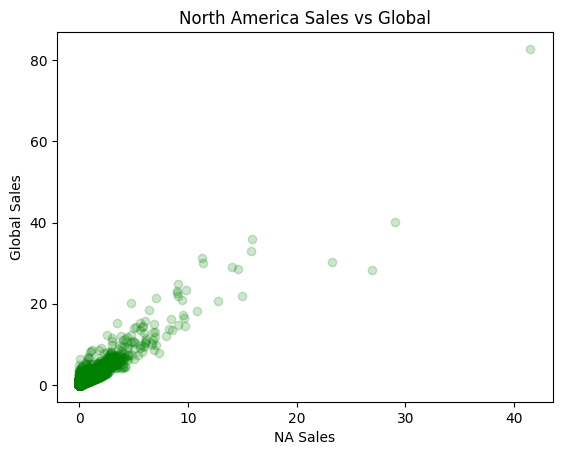

In [26]:
# create a 2D scatter plot to 'eyeball' the relationship between your chosen feature and global_sales
plt.scatter(df_VideoGameCleaned["na_sales"],df_VideoGameCleaned["global_sales"],color='g',alpha=0.2,marker='o',cmap="plasma")
plt.title("North America Sales vs Global")
plt.xlabel("NA Sales")
plt.ylabel("Global Sales")

In [15]:
# Seperate the Features and the Target
df_VideoGameCleaned_features = df_VideoGameCleaned.drop(columns="global_sales")
df_VideoGameCleaned_target = df_VideoGameCleaned["global_sales"].copy().reset_index()



In [16]:
# Print the feature dataframe
df_VideoGameCleaned_features.head()

,platform,year,genre,publisher,na_sales
0,0.733333,0.30,0.818182,0.248696,41.49
1,-0.266667,-0.75,-0.272727,0.248696,29.08
2,0.733333,0.40,0.090909,0.248696,15.85
3,0.733333,0.45,0.818182,0.248696,15.75
4,-0.666667,-0.20,0.272727,0.248696,11.27


In [17]:
# Print the target dataframe
df_VideoGameCleaned_target.head()

,index,global_sales
0,0,82.74
1,1,40.24
2,2,35.82
3,3,33.00
4,4,31.37


In [18]:
# use train_test_split to get your dataset ready for training and testing
x_train, x_test, y_train, y_test = train_test_split(df_VideoGameCleaned_features,df_VideoGameCleaned_target,test_size=0.2)

# print out the shape of the trainig and testing, feature and targets
print('Shape of X_train: ', x_train.shape)
print('Shape of X_test: ', x_test.shape)
print('Shape of y_train: ',y_train.shape)
print('Shape of y_test: ',y_test.shape)

Shape of X_train:  (13032, 5)
Shape of X_test:  (3259, 5)
Shape of y_train:  (13032, 2)
Shape of y_test:  (3259, 2)


In [19]:
# Import the LinearRegression class from sklearn.linear_model
from sklearn.linear_model import LinearRegression

# Initalize the LinearRegression object
le = LinearRegression()

#!!! Important !!!
# Fit your Linear Regressor on only ** one ** of the features in your X's, 
# HINT: If you have multiple features in your X_train, select your chosen feature for singular linear regression and make a new dataframe
x_train_feat = x_train["na_sales"].reset_index()
x_test_feat = x_test["na_sales"].reset_index()

le.fit(x_train_feat,y_train)

# Get your predictions from your fitted model
y_pred_train = le.predict(x_train_feat)
y_pred_test = le.predict(x_test_feat)
# use the model's class function .score to calculate the r^2 value
train_score = le.score(x_train_feat,y_train)
test_score = le.score(x_test_feat,y_test)
# print out the r2 vaule for the linear regressor

print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')

Train Score: 0.9451709782598063
Test Score: 0.9421482181791254


In [20]:
# Coefficients and intercept (y = wx + b), where w is the weight, or coefficent of x, and b is the y-intercept
print(f'Coefficients: {le.coef_[0]}')
print(f'Intercept: {le.intercept_}')

Coefficients: [1.00000000e+00 7.00520061e-15]
Intercept: [1.81898940e-12 2.42364284e-01]


In [22]:
print(x_train_feat.head())
print(y_pred_train)

   index  na_sales
0   9483      0.00
1   8235      0.13
2   5923      0.06
3   2801      0.35
4  13873      0.03
[[ 9.48300000e+03  5.18454827e-02]
 [ 8.23500000e+03  3.01477366e-01]
 [ 5.92300000e+03  2.27010436e-01]
 ...
 [ 1.61340000e+04 -6.45030882e-02]
 [ 8.20600000e+03  2.67512475e-01]
 [ 1.27900000e+03  9.93987593e-01]]


/tmp/ipykernel_372006/3694692457.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_train_feat["na_sales"],y_pred_train[:,1],color='g',alpha=0.2,marker='o',cmap="plasma")


Text(0, 0.5, 'Global Sales')

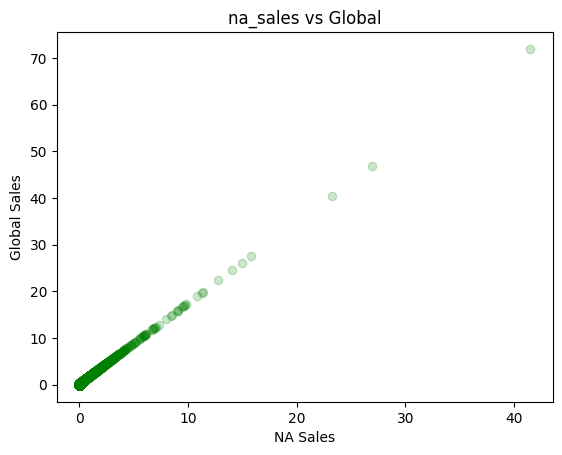

In [25]:
# Use a scatter plot to show how the line passes through the dataset
# You can optionally spilt the train and test set by color, and plot the line by passing X_test, and y_pred
plt.scatter(x_train_feat["na_sales"],y_pred_train[:,1],color='g',alpha=0.2,marker='o',cmap="plasma")
#plt.scatter(x_test_feat,y_test,color='b',alpha=0.2,marker='o',cmap="plasma")
plt.title("na_sales vs Global")
plt.xlabel("NA Sales")
plt.ylabel("Global Sales")

### Linear Regression Questions: 

1. What was the final r^2 value of your model? 
2.  What does this tell us? 

- [Your Answer Here]

3. Can we get more performance from this model? 
4. If so, how? If not, why?
- [Your Answer Here]

5. Would it be beneficial to perform multiple linear regresssion? I.e. use several features to predict the target?
6. Why?
- [Your Answer Here]

7. Why is there one feature in particular that tracks so well with the target, global_sales?
- [Your Answer Here]

# 2. Multi Classification - Classify the *"Quality"* variable (3~9) for Wine Data
## Use the numeric features in the wine dataset to predict a 'class'
## https://www.kaggle.com/datasets/yasserh/wine-quality-dataset/data

In [ ]:
# Load the wine dataset
df_wine = pd.read_csv('wine_data.csv')
df_wine

In [ ]:
# this feature will be our target variable
df_wine.quality.unique()

In [ ]:
df_wine.describe()

In [ ]:
y = df_wine.quality
y

In [ ]:
X = df_wine.drop('quality', axis=1)
X

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler(feature_range=(-1, 1))

X = mm_scaler.fit_transform(X)
X = pd.DataFrame(data=X, columns=df_wine.drop('quality', axis=1).columns)
X

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state=1)

print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ',X_test.shape)
print('Shape of y_train: ',y_train.shape)
print('Shape of y_test: ',y_test.shape)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Initialize and train a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

In [ ]:
# Calculate the confusion matrix by passing the true y lables, and the predicted y lables
cm = confusion_matrix(y_test, y_pred)

# Use the ConfusionMatrixDisplay from skelearn to get a quick and easy graph
ConfusionMatrixDisplay(cm).plot()
plt.title('RandomForestClassifier - Confusion Matrix')
plt.show()

### Multiclass Classifier Questions
1. Summarize the steps I took to create this multiclass classifier

   -
   -
   -
   -
   -
2. Interpret the Confusion Matrix and Classification Report

3. How could we improve this model? Be specific.

   -
   -
   -
4. What other models might be good to solve this problem?
5. What are the potential downsides of solving this as a classification problem?
6. What are the benifits of solving this as a classification problem?
   

# 3. Binary Classification - Cure The Princess
## https://www.kaggle.com/datasets/unmoved/cure-the-princess

In [ ]:
df_Quest = pd.read_csv('Cure_the_princess.csv')
df_Quest

In [ ]:
# Envoke the describe command on the dataset


In [ ]:
# Plot the values from the .corr() command on a heat map


In [ ]:
# Seperate your ingredients (features) from the outcome (target)
X = df_Quest.drop('Cured', axis=1)
X

In [ ]:
# Seperate out Cured (target)
y = df_Quest.Cured
y

In [ ]:
# Import MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Initalize the MinMaxScaler with feature_range=(-1, 1)

# Transform the Ingridents (X) using the MinMaxScaler


In [ ]:
# Seperate the training and testing data using the train_test_split function


# print the shape of your datasets
print('Shape of X_train: ',)
print('Shape of X_test: ',)
print('Shape of y_train: ',)
print('Shape of y_test: ',)

In [ ]:
# Import Statements
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score, RocCurveDisplay

# Initialize and train a LogisticRegressior

# Make class predictions 

# Make probability predicitons, named y_proba

# Evaluate accuracy using the accuracy_score function from sklearn

# print the classification_report for your logistic regressor


In [ ]:
# Create a confusion matrix using the confusion_matrix function, and save it to a variable named cm

# Using ConfusionMatrixDisplay pass your variable named cm that you just created


In [ ]:
# use the (receiver operating characteristic) roc_curve function to calculate the falsepositive_rate, truepositive_rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])

# use the roc_auc_score to calculate the Area Under the Curve (AUC)
auc = roc_auc_score(y_test, y_proba[:, 1])

In [ ]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(False)
plt.show()

### Cure the Princess
1. What ingredients should you use?
2. How can you be certain that these are the correct ingredients?
3. Can you determine the **exact ratio** of ingredients that maximizes the princess' survival?
4. Should attempt to convience the king that you know to cure the princess, or should you conduct more experiments?
5. *Assuming* that you are ready to cure the princess, convince the king.